## This represents the Medicare Star Rating System results
<img src="HospitalCompare.PNG"> @ https://data.medicare.gov/

## These results are prepared using the protocol in this book 
<img src="sedm.png"> @ http://www.springer.com/us/book/9783319484136

## Part I: Data collection and counting.

## This is the 12/19/2017 Medicare Hospital Compare dataset from https://data.medicare.gov/

## This represents the Crosstab Counts of State verses Patient Star Ratings

In [126]:
DF1 = pd.crosstab(df.State, [df.Patient_Survey_Star_Rating], margins=False)
DF1

Patient_Survey_Star_Rating,1,2,3,4,5
State,,,,,
AK,3,20,57,36,4
AL,17,136,305,340,66
AR,26,106,208,194,66
AZ,45,245,273,177,28
CA,467,1178,1212,579,104
CO,3,39,215,341,50
CT,11,72,150,85,6
DC,29,34,18,3,0
DE,0,10,35,24,3


## Part II: Visualization of the count data.

## Heat Maps

#This is a Heatmap of the crosstab data counts above. 
-- The horizonal axis represents Star Rations 1 - 5 (0 - 4) and 5 being the total.
-- The counts are summed on the Y axis.

In [128]:
data = [go.Heatmap( z=DF1.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap')

## Pie Charts
--These Pie Charts represents percentages of events.

-- This Pie Chart represents the counts of hospitals per state where CA has the largest number of evaluated hospitals. 

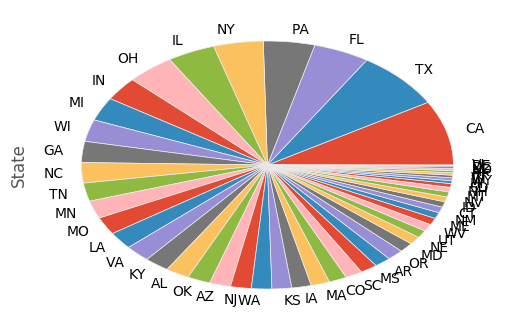

In [15]:
df['State'].value_counts().plot(kind="pie")

## Patient Survey Star Ratings
-- This Pie Chart represents the counts of Patient Survey Star Ratings of 1 through 5. 

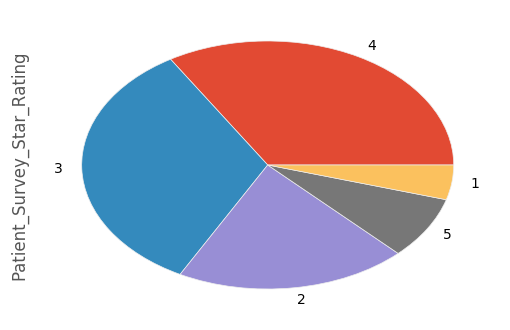

In [16]:
df['Patient_Survey_Star_Rating'].value_counts().plot(kind="pie")

##  HCAHPS Star Rating Measurements
-- This Pie Chart represents the HCAHPS Star Rating Measurements. 

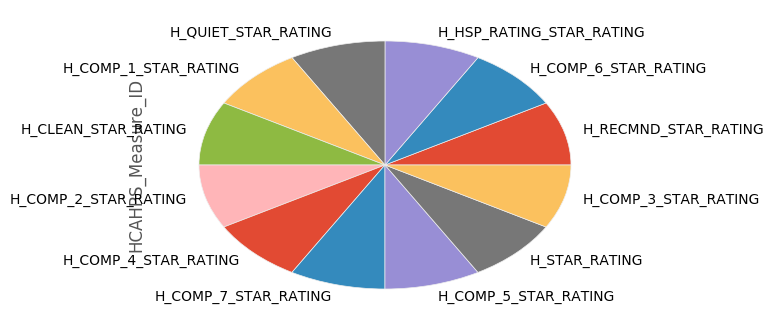

In [17]:
df['HCAHPS_Measure_ID'].value_counts().plot(kind="pie")

##  HCAHPS Answer Descriptions
-- This Pie Chart represents the HCAHPS Star Rating Measurement Areas of Interest. 

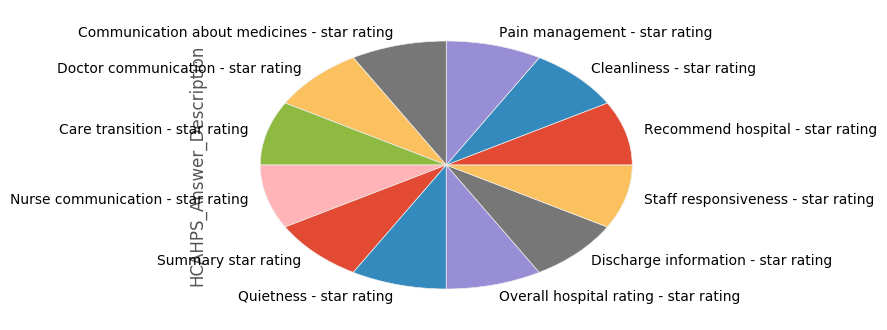

In [18]:
df['HCAHPS_Answer_Description'].value_counts().plot(kind="pie")

## Stacked Barplots

--Horzinal stacks of Patient Survey Star Ratings per state.

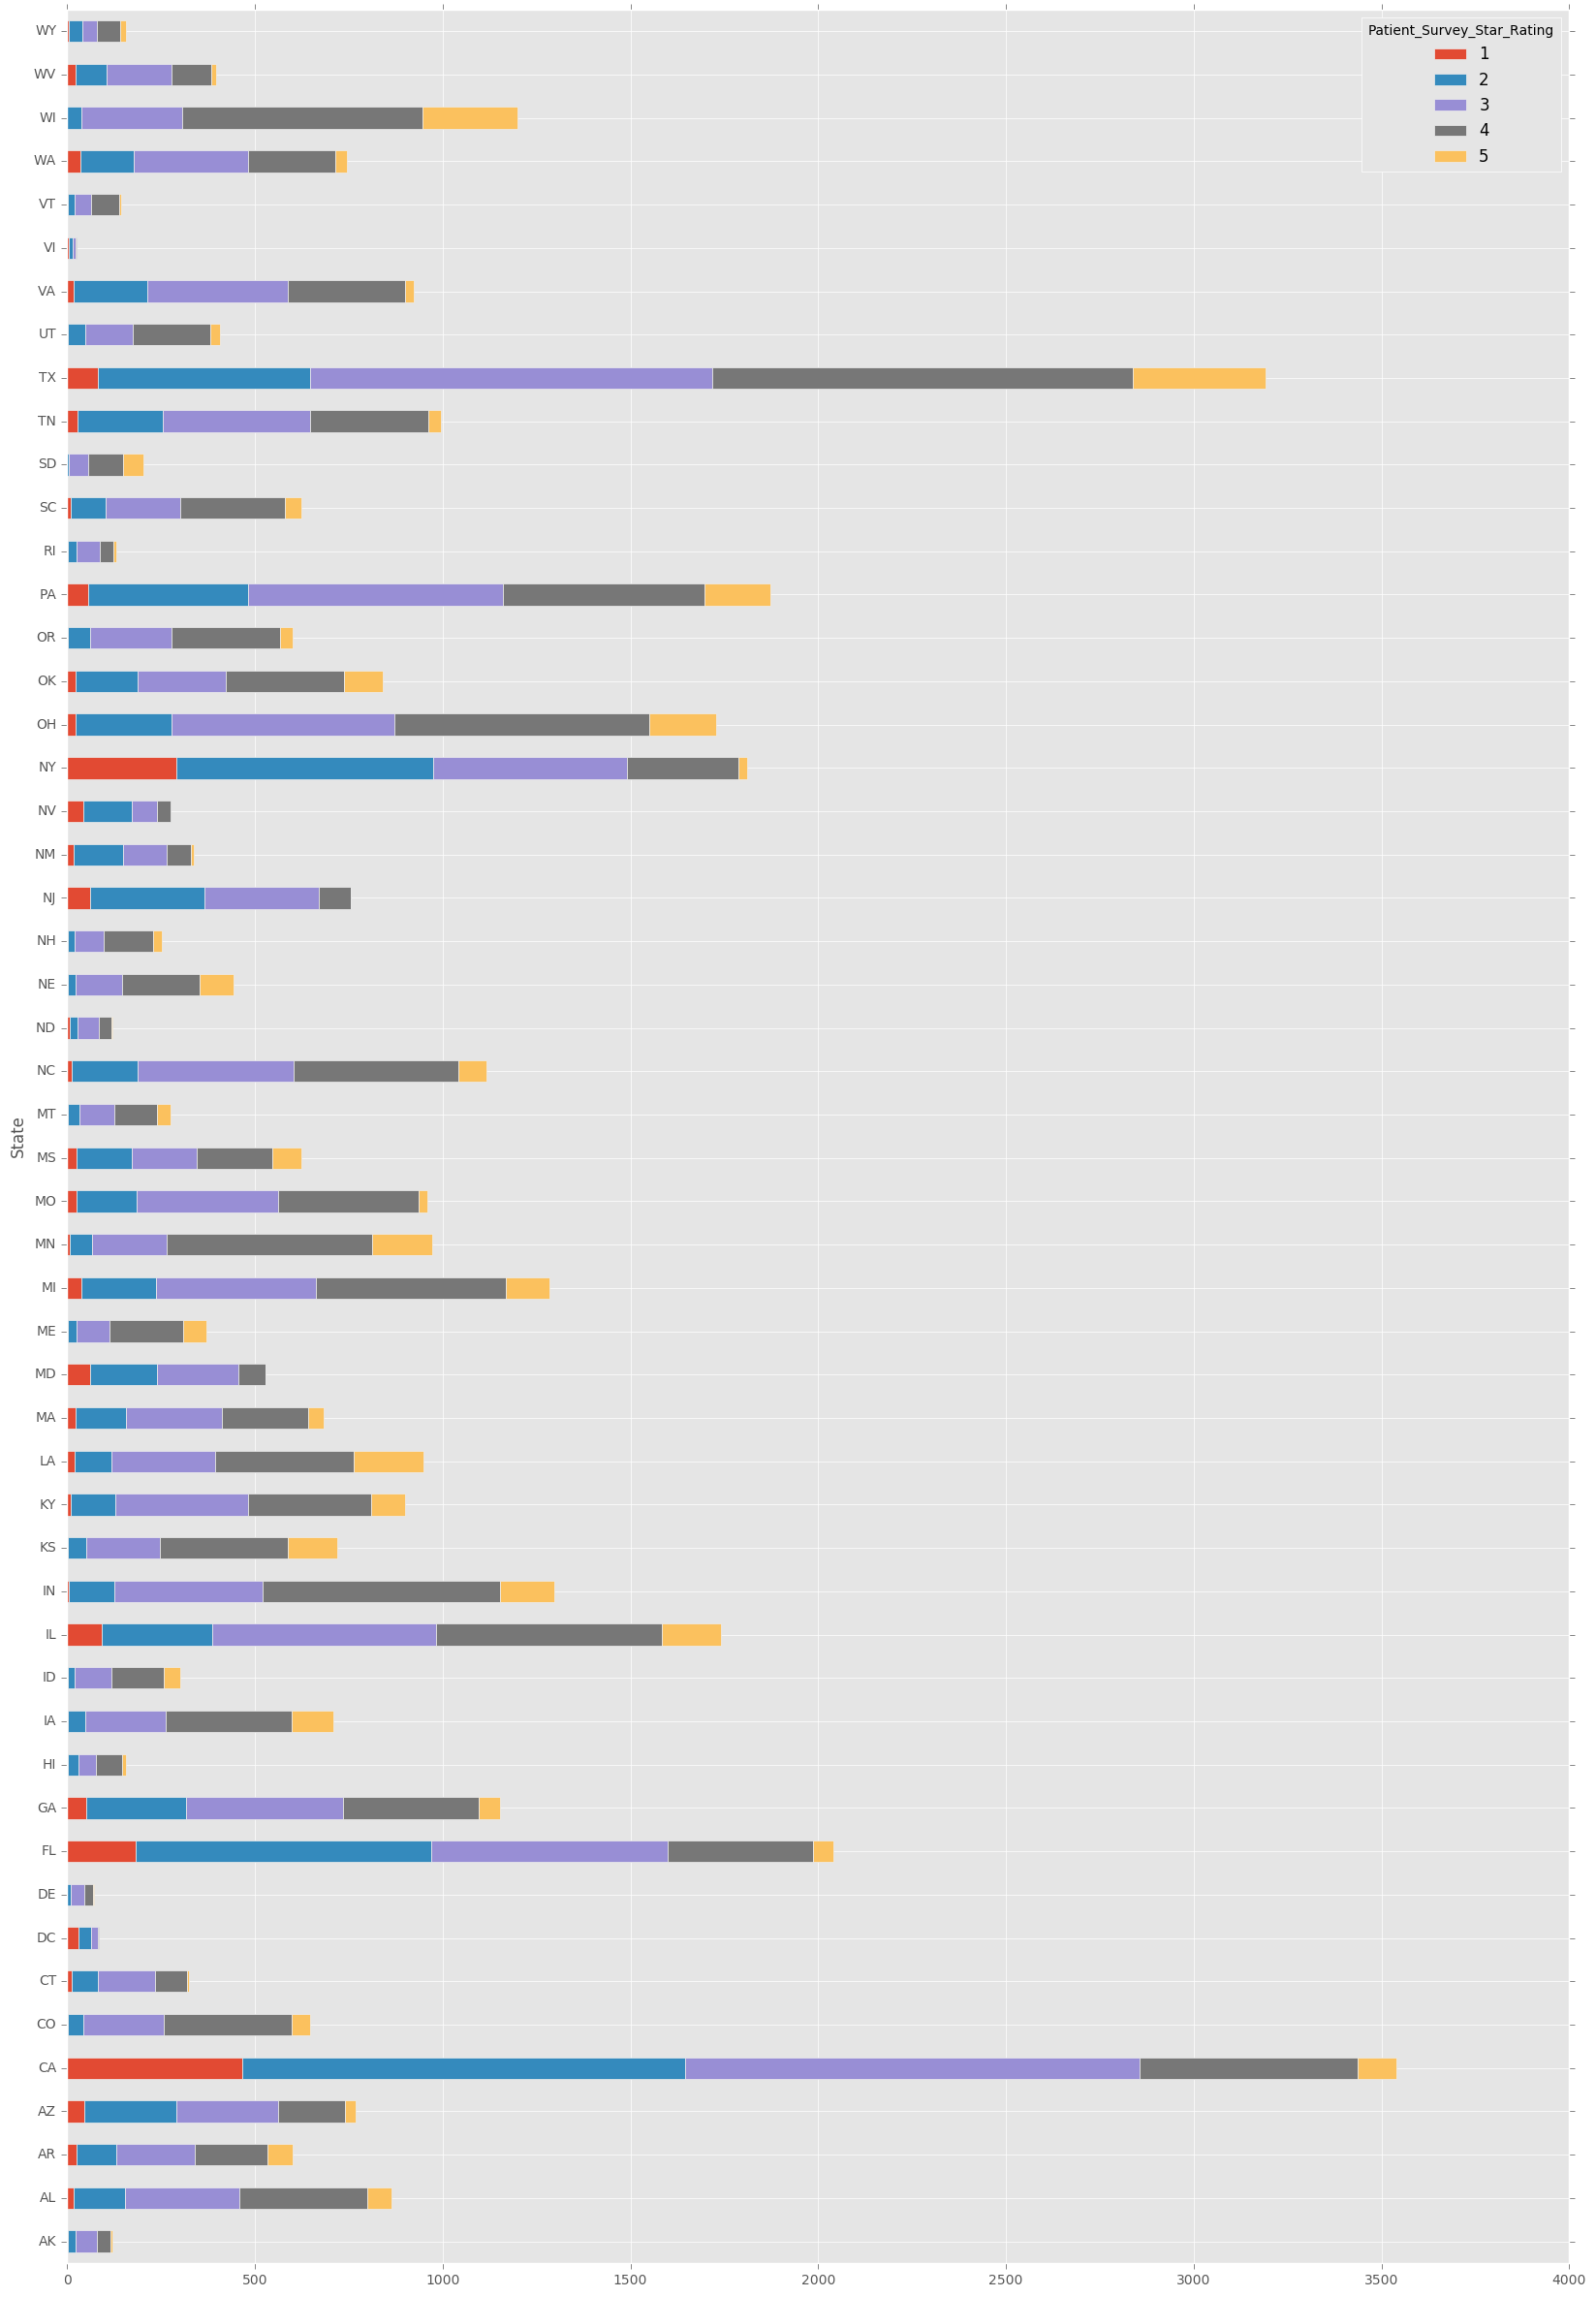

In [19]:
#http://localhost:8888/notebooks/DataVisualization/Bar%20Charts.ipynb
#DF1.plot.barh(stacked=True);

#DF1.plot(kind='bar',figsize=(20, 20))
DF1.plot(kind='barh', stacked=True,figsize=(20, 30))


--Vertical stacks of Patient Survey Star Ratings per state.

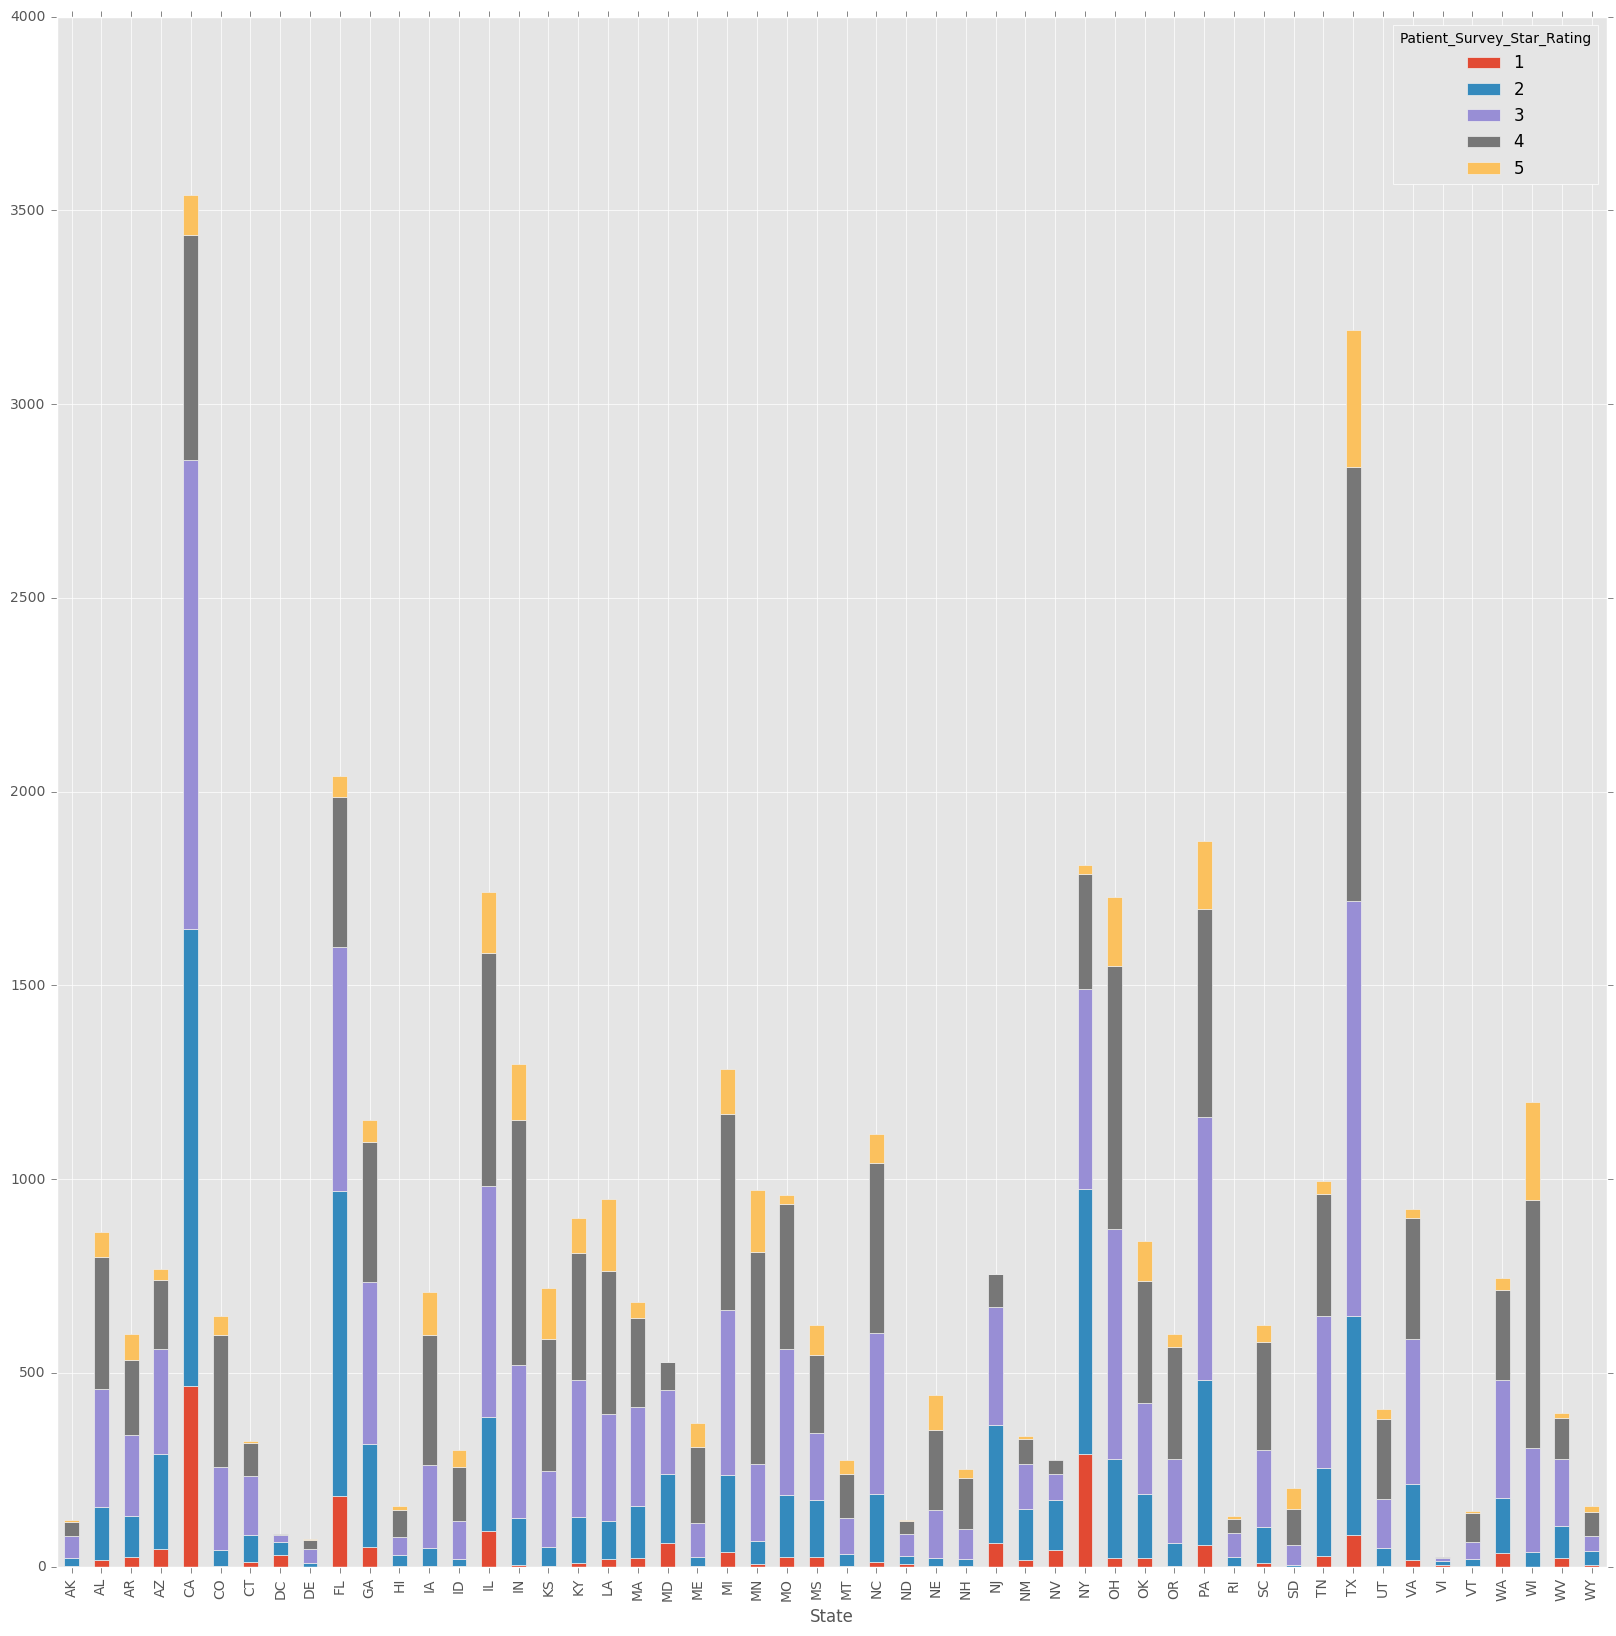

In [20]:
DF1.plot(kind='bar',stacked=True, figsize=(20, 20))

--Horzinal stacked plots of Patient Survey Star Ratings per state.

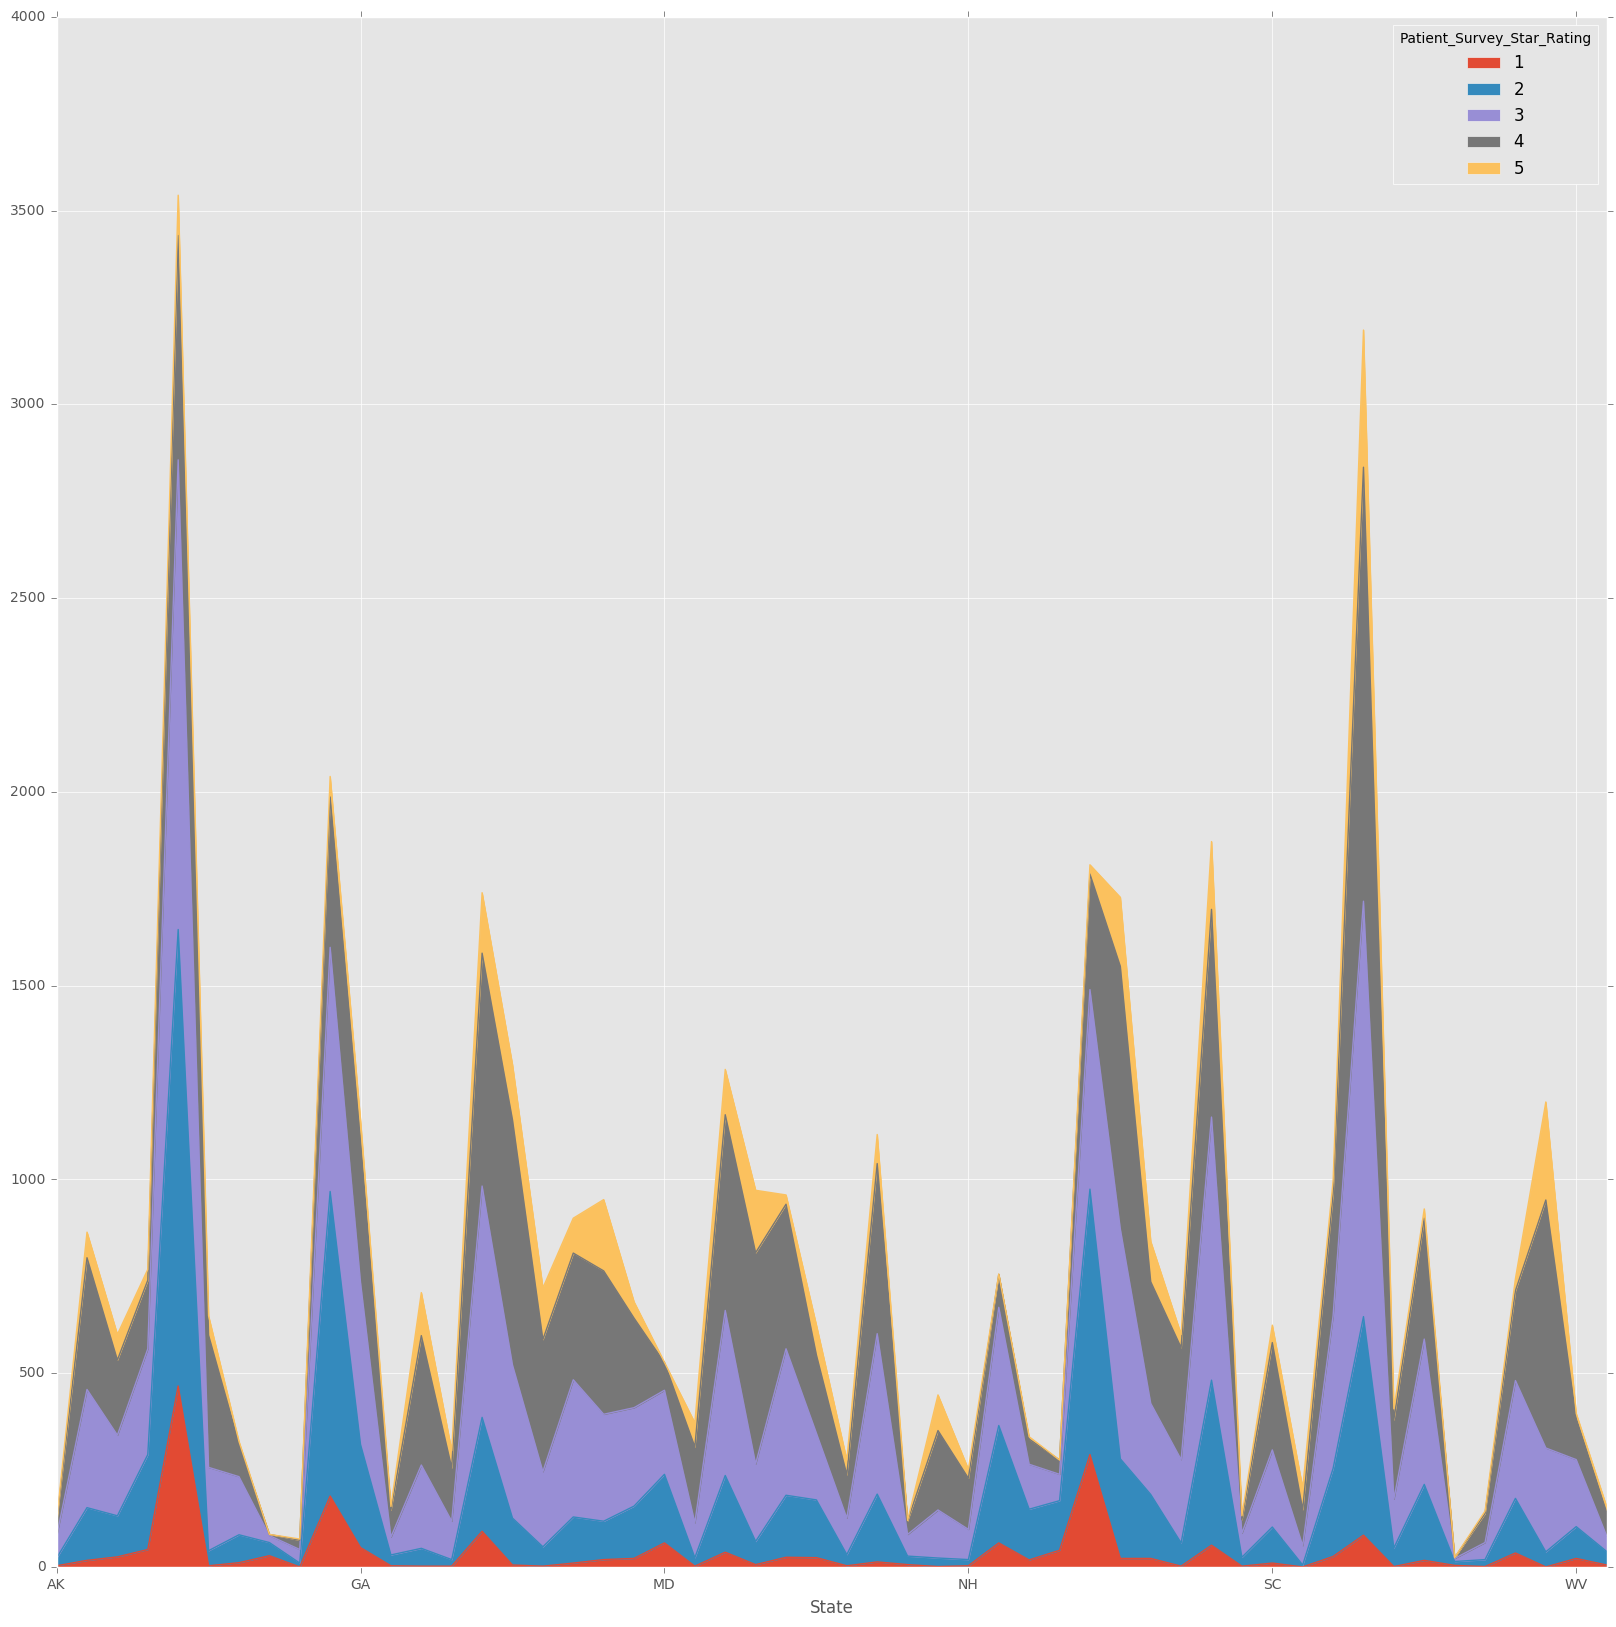

In [21]:
#http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot
DF1.plot.area(figsize=(20, 20));

--Horzinal stacked plots of Patient Survey Star Ratings per state.

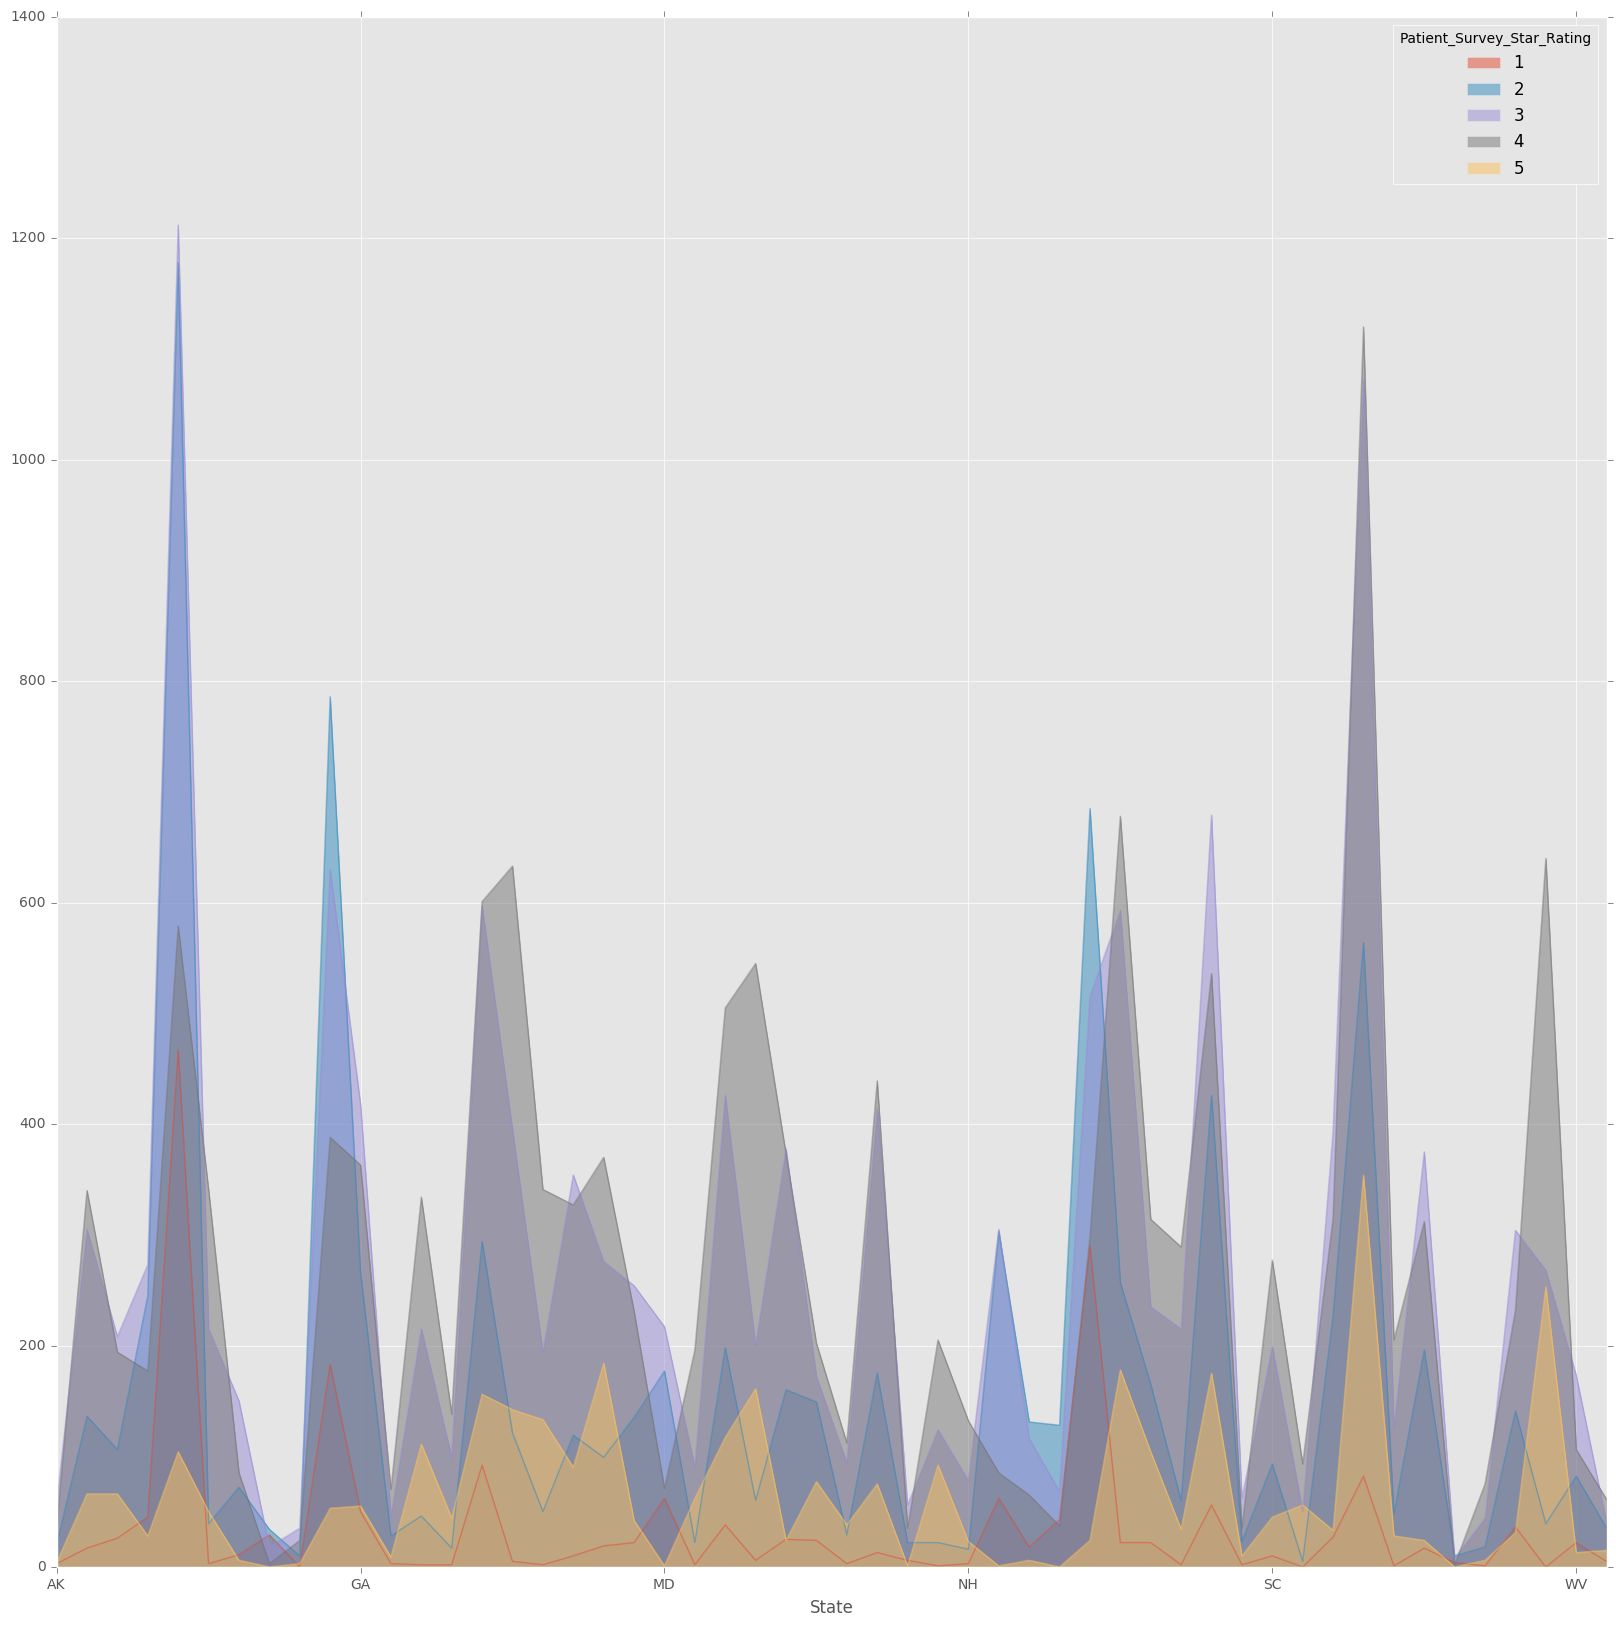

In [22]:
DF1.plot.area(stacked=False,figsize=(20, 20));

--Horzinal Box plots of Patient Survey Star Ratings per state.

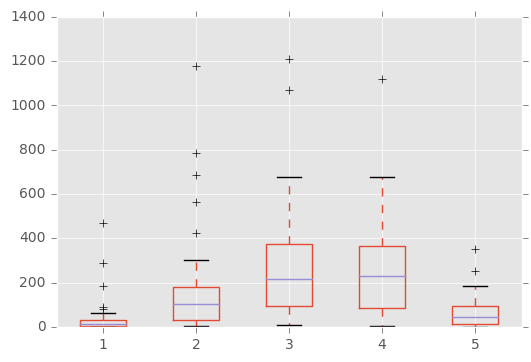

In [23]:
DF1.plot(kind='box')

## Part III: Bayes' thoerem outputs

# These represent the probability of a State given a Star Rating 
For example, the probability of CA having a Star rating of 1 = 24.6%, in relationship to all other states.

<img src="stategnstar.png">


In [96]:
def percConvert(ser):
    return ser/float(ser[-1])

In [118]:
#SR = pd.crosstab([df.Patient_Survey_Star_Rating, margins=True], df.State, margins=True).apply(percConvert, axis=0)
#DF1 = pd.crosstab(df.State, [df.Patient_Survey_Star_Rating], margins=True).apply(percConvert, axis=0)

SR = pd.crosstab([df.State], df.Patient_Survey_Star_Rating, margins=True).apply(percConvert, axis=0)
SR

Patient_Survey_Star_Rating,1,2,3,4,5,All
State,,,,,,
AK,0.001582,0.002362,0.004060,0.002541,0.001174,0.002859
AL,0.008966,0.016062,0.021722,0.024003,0.019372,0.020583
AR,0.013713,0.012519,0.014814,0.013696,0.019372,0.014294
AZ,0.023734,0.028936,0.019443,0.012496,0.008218,0.018296
CA,0.246308,0.139128,0.086319,0.040875,0.030525,0.084334
CO,0.001582,0.004606,0.015312,0.024073,0.014676,0.015437
CT,0.005802,0.008504,0.010683,0.006001,0.001761,0.007719
DC,0.015295,0.004016,0.001282,0.000212,0.000000,0.002001
DE,0.000000,0.001181,0.002493,0.001694,0.000881,0.001715


In [129]:
data = [go.Heatmap( z=SR.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap')

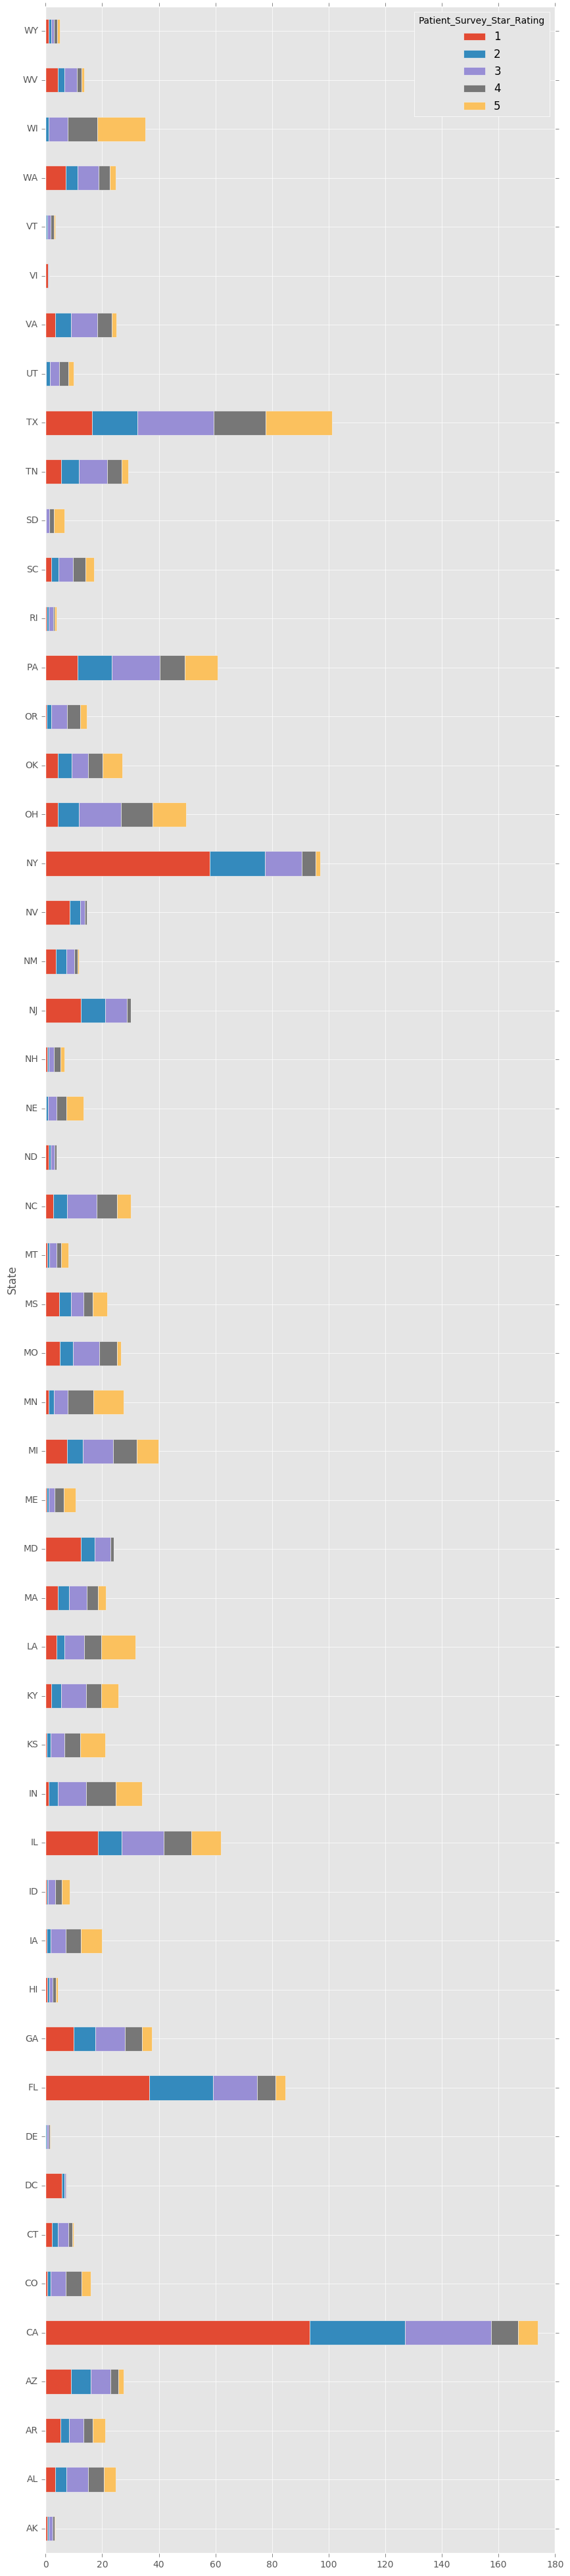

In [121]:
SR.plot(kind='barh', stacked=True,figsize=(10, 50))

# These represent the probability of a Star Rating given a State 
For example, the probability of a Star Rating of 1 given AK = 47.5%, in relationship to all other Star Ratings.

<img src="stargnstate.png">

In [117]:
RS = pd.crosstab([df.State], df.Patient_Survey_Star_Rating, margins=True).apply(percConvert, axis=1)
RS

Patient_Survey_Star_Rating,1,2,3,4,5,All
State,,,,,,
AK,0.025000,0.166667,0.475000,0.300000,0.033333,1.0
AL,0.019676,0.157407,0.353009,0.393519,0.076389,1.0
AR,0.043333,0.176667,0.346667,0.323333,0.110000,1.0
AZ,0.058594,0.319010,0.355469,0.230469,0.036458,1.0
CA,0.131921,0.332768,0.342373,0.163559,0.029379,1.0
CO,0.004630,0.060185,0.331790,0.526235,0.077160,1.0
CT,0.033951,0.222222,0.462963,0.262346,0.018519,1.0
DC,0.345238,0.404762,0.214286,0.035714,0.000000,1.0
DE,0.000000,0.138889,0.486111,0.333333,0.041667,1.0


In [130]:
data = [go.Heatmap( z=RS.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap')

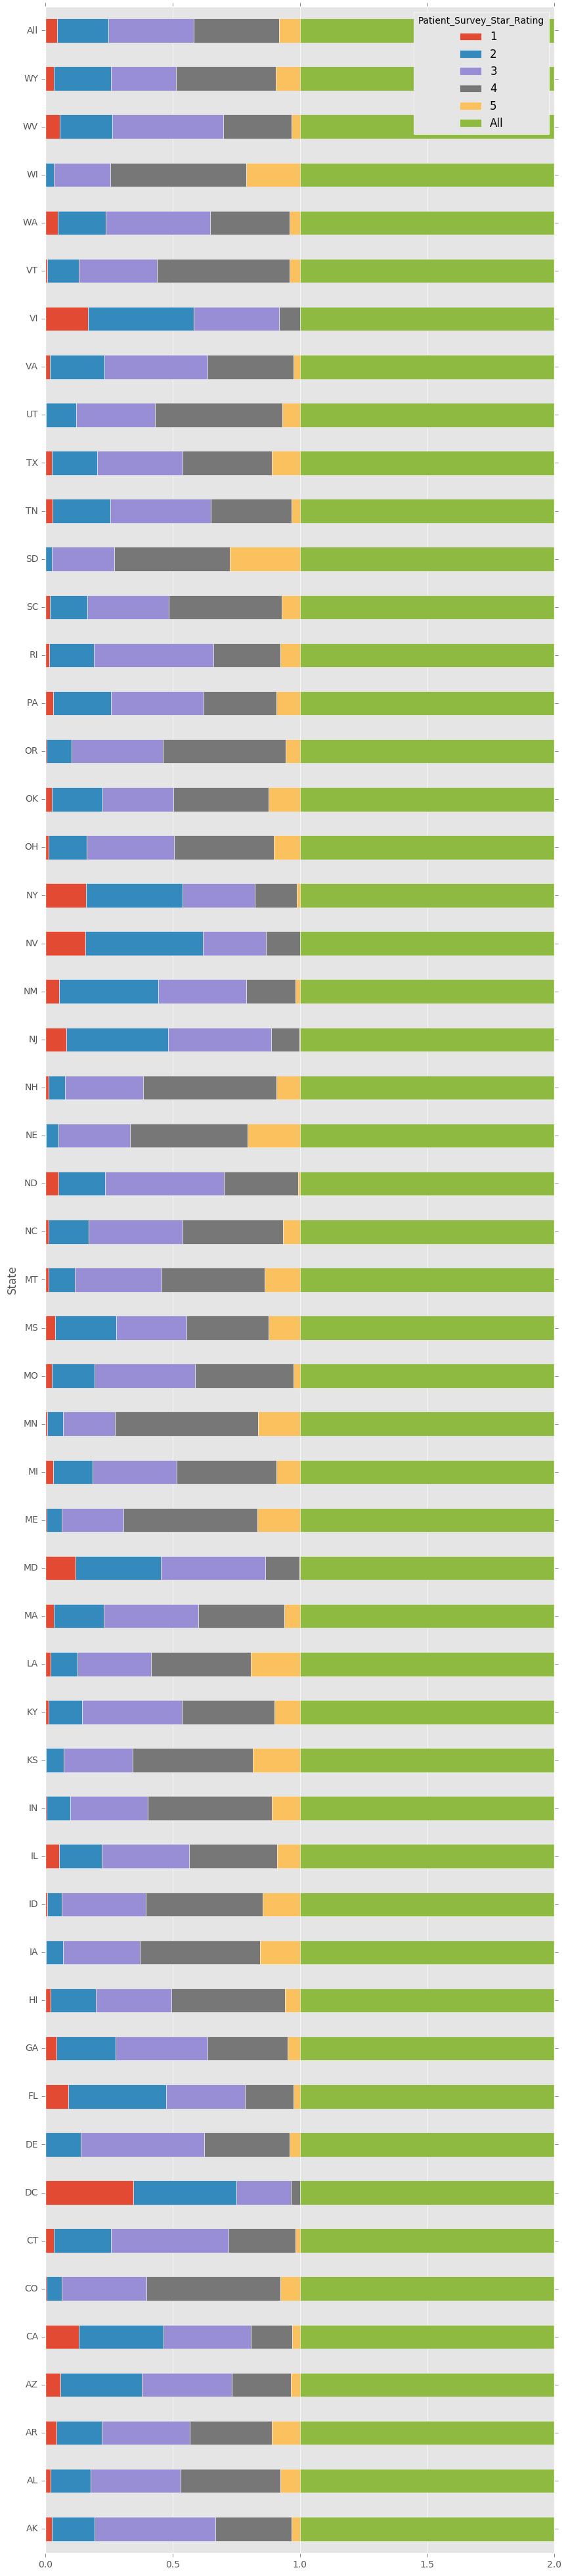

In [116]:
RS.plot(kind='barh', stacked=True,figsize=(10, 50))